In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [28]:
df = pd.read_csv('email_spam_dataset.csv')

### 2 Feature and target

In [29]:
X = df[['Num_Emails']]
y = df['Spam']

### 3. Train-test Split(80-20)
Startify=y means both training and test sets should have same split between spam (0 and non-spam(1))classes

e.g. if not-spam is 90% in the training, it must be 90% in test also

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training samples: {len(X_train)}')
print(f'Test samples: {len(X_test)}')

Training samples: 800
Test samples: 200


### 4. Train Logistics regression

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 5. Predict probabilites and labels on TEST set

In [32]:
y_prob = model.predict_proba(X_test)[:,1]   #Probability that Spam =1
y_pred = (y_prob >= 0.5).astype(int)         #Descision boundary = 0.5
print(y_prob, y_pred)

[0.38087665 0.03951997 0.16589329 0.02036441 0.28782074 0.49014979
 0.4967136  0.06192279 0.38708813 0.45091683 0.08295777 0.30982211
 0.35643534 0.04262123 0.58133024 0.04156247 0.5620426  0.46395099
 0.02089495 0.7067601  0.67882983 0.53604121 0.08915134 0.15527714
 0.21418278 0.04370573 0.06831259 0.18094237 0.32691519 0.31546524
 0.04262123 0.07904876 0.02256899 0.50327855 0.04262123 0.0375739
 0.26677784 0.03482654 0.06041481 0.5620426  0.73321603 0.43794968
 0.24189221 0.0375739  0.36248158 0.03663573 0.20979615 0.06666006
 0.06041481 0.67307791 0.01934262 0.5620426  0.01885074 0.07904876
 0.41228481 0.67882983 0.09575904 0.57492558 0.39333654 0.7067601
 0.15186379 0.16589329 0.60665597 0.75325378 0.08098176 0.73321603
 0.63751117 0.02256899 0.74336293 0.55556846 0.06041481 0.54256559
 0.04481653 0.39333654 0.772254   0.03310363 0.75325378 0.35643534
 0.6957583  0.71217283 0.01934262 0.74834061 0.69017118 0.50327855
 0.08295777 0.52295758 0.17708311 0.08497753 0.05750143 0.070003

### 6. Confusion Matrix

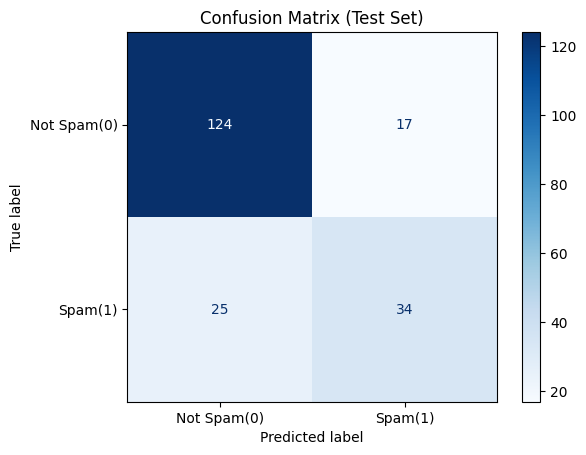

In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam(0)', 'Spam(1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()

### 7. Evaluation Metrics

In [34]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1-score: {f1}')

Accuracy: 0.79
Precision: 0.6666666666666666
Recall: 0.576271186440678
F1-score: 0.6181818181818182
